In [179]:
import pandas as pd
import numpy as np




df = pd.read_csv('file.txt')
str_n = df.columns[3]
str_m = df.columns[4]
df = df.drop([str_n, str_m], axis=1)
df.columns=['x', 't', 'v']
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       15 non-null     float64
 1   t       15 non-null     float64
 2   v       15 non-null     float64
dtypes: float64(3)
memory usage: 488.0 bytes
      x     t         v
0   0.0  0.00  1.000000
1   0.0  1.25  0.315322
2   0.0  2.50 -0.801144
3   0.0  3.75 -0.820559
4   0.0  5.00  0.283662
5   0.5  0.00  0.750000
6   0.5  1.25 -0.371585
7   0.5  2.50 -1.006170
8   0.5  3.75 -1.373490
9   0.5  5.00 -3.944090
10  1.0  0.00  0.000000
11  1.0  1.25 -0.958924
12  1.0  2.50 -0.544021
13  1.0  3.75  0.650288
14  1.0  5.00  0.912945


In [180]:
n = int(str_n)
m = int(str_m)
print(n,m)

2 4


In [181]:
X = []
T = []
V = []
for i in range(n + 1):
    x = []
    t = []
    v = []
    for j in range(m + 1):
        x.append(df.loc[i * (m + 1) + j, 'x'])
        t.append(df.loc[i * (m + 1) + j, 't'])
        v.append(df.loc[i * (m + 1) + j, 'v'])
    X.append(x)
    T.append(t)
    V.append(v)
X = np.array(X)
T = np.array(T)
V = np.array(V)

In [182]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

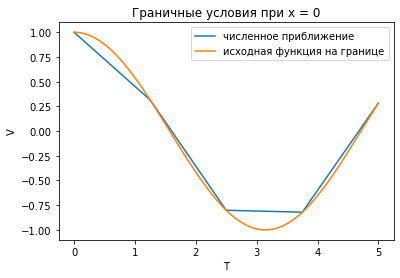

In [183]:
plt.plot(T[0], V[0], label='численное приближение')
plt.plot(np.linspace(0, 5, 1000), [np.cos(t) for t in np.linspace(0, 5, 1000)], label = 'исходная функция на границе')
plt.xlabel('T')
plt.ylabel('V')
plt.title('Граничные условия при x = 0')
plt.legend()
plt.show()

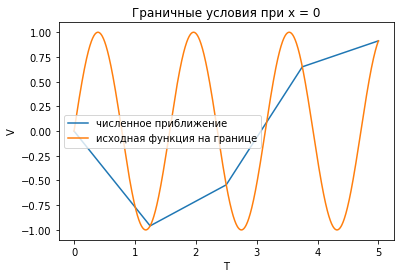

In [184]:
plt.plot(T[n], V[n], label='численное приближение')
plt.plot(np.linspace(0, 5, 1001), [np.sin(4 * t) for t in np.linspace(0, 5, 1001)], label = 'исходная функция на границе')
plt.xlabel('T')
plt.ylabel('V')
plt.title('Граничные условия при x = 0')
plt.legend()
plt.show()

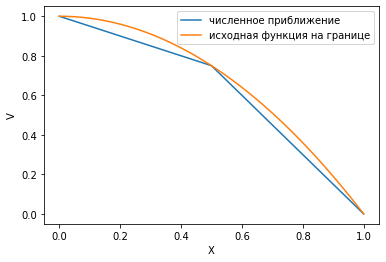

In [185]:
plt.plot(np.transpose(X)[0], np.transpose(V)[0], label = 'численное приближение')
plt.plot(np.linspace(0, 1, 1001), [1 - x * x for x in np.linspace(0, 1, 1001)], label = 'исходная функция на границе')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()
plt.show()

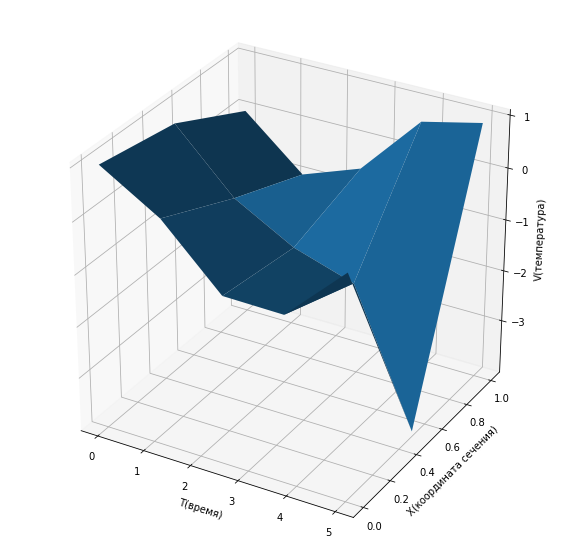

In [186]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# Grab some test data.
#X, Y, Z = axes3d.get_test_data(0.05)
#print(X)
# Plot a basic wireframe.
ax.plot_surface(T, X, V)
ax.set_xlabel('T(время)')
ax.set_ylabel('X(координата сечения)')
ax.set_zlabel('V(температура)')

plt.show()